## Importing required Libraries

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import display, Image

In [4]:
from IPython import display

In [5]:
display.clear_output()

## Check for the access for GPU

In [6]:
!nvidia-smi

Wed Apr  2 06:15:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


## Install Ultralytics using PIP

In [9]:
!pip install ultralytics

Checking if YOLOv8 is Installed and is working fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.4/235.7 GB disk)


## Import Hand Gesture ASL from roboflow

In [12]:
!mkdir /content/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [13]:
!pwd

/content


In [14]:
%cd /content/datasets

/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fKCJGst3X0agvb8zVqh4")
project = rf.workspace("cecilia-ggvz6").project("asldetection-o5fgv")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


## Train the custom dataset

In [17]:
%cd /content/datasets

/content/datasets


In [18]:
%cd /content/datasets/ASLDetection-2

/content/datasets/ASLDetection-2


In [19]:
#as this is a small dataset so I only train for 70 epochs, but you can adjust based on your desire
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/ASLDetection-2/data.yaml epochs=200 imgsz=320

/content
100% 6.25M/6.25M [00:00<00:00, 93.0MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/ASLDetection-2/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

In [20]:
!ls {HOME}/runs/detect/train

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1743574550.fcc747910ca3.9303.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


## Displaying Confusion Matrix

/content


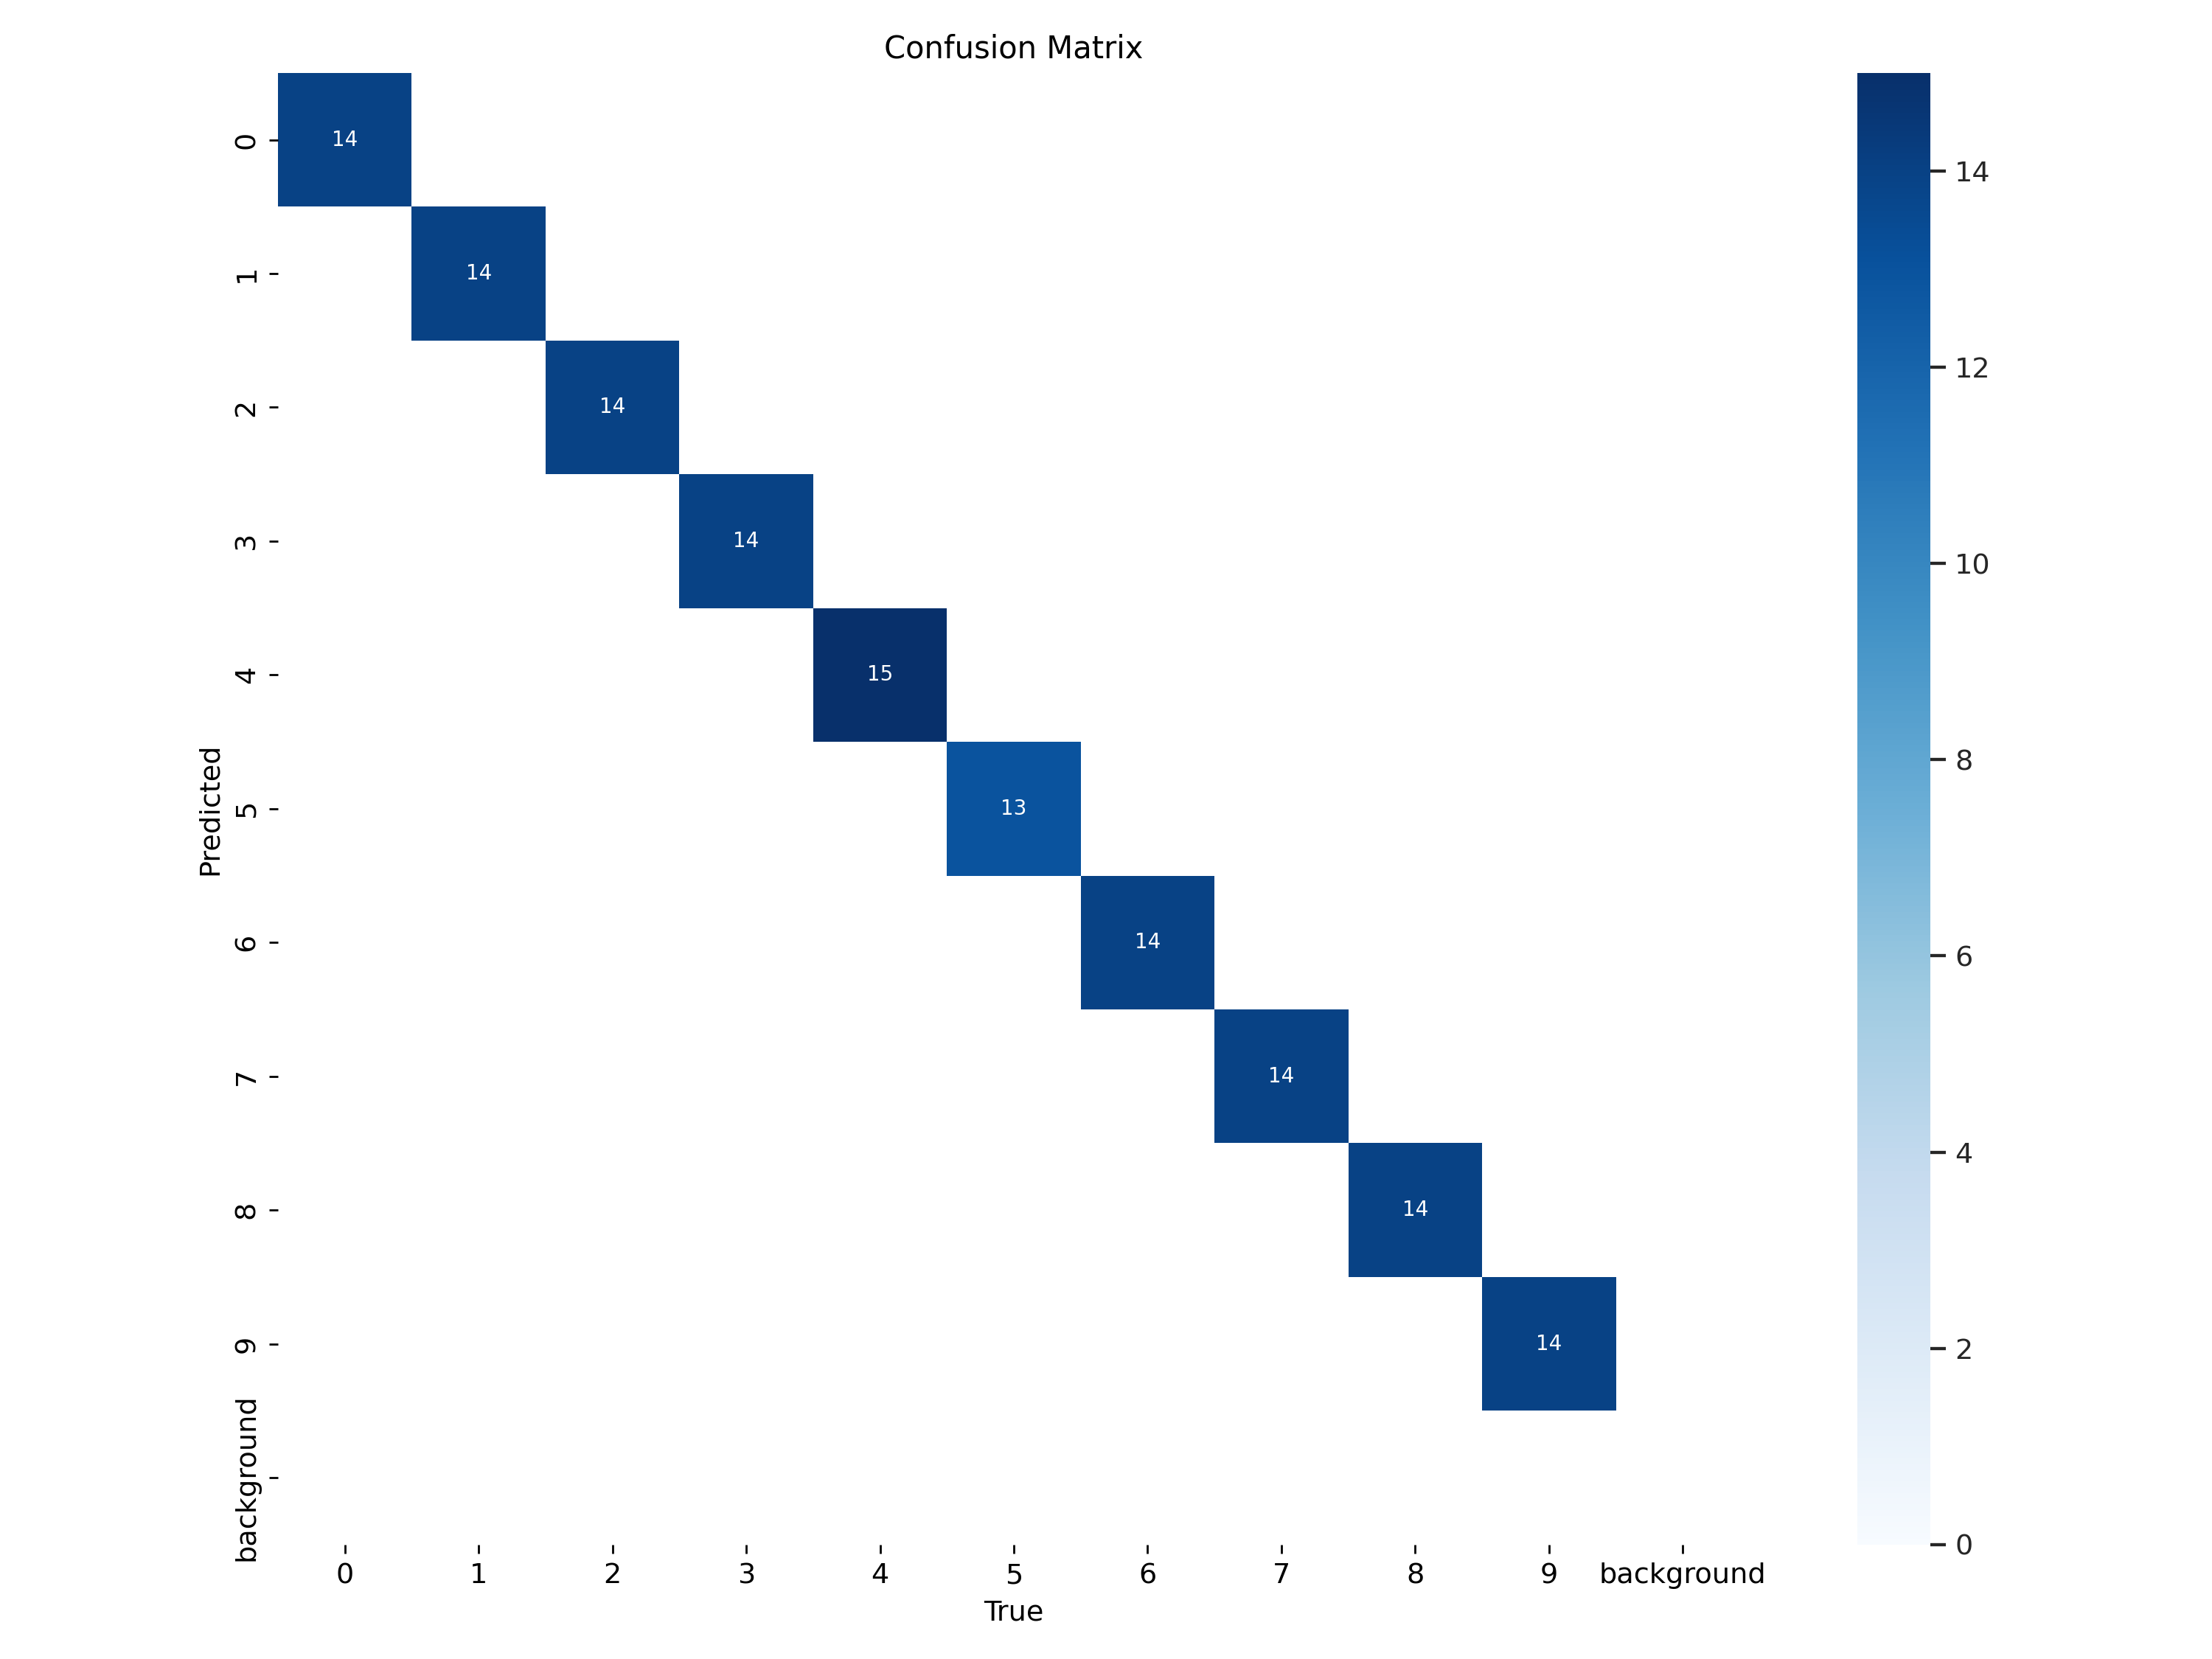

In [21]:
# the clean confusion matrix shows that it has very high precision
%cd /content
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

## Training and Validation Loss

/content


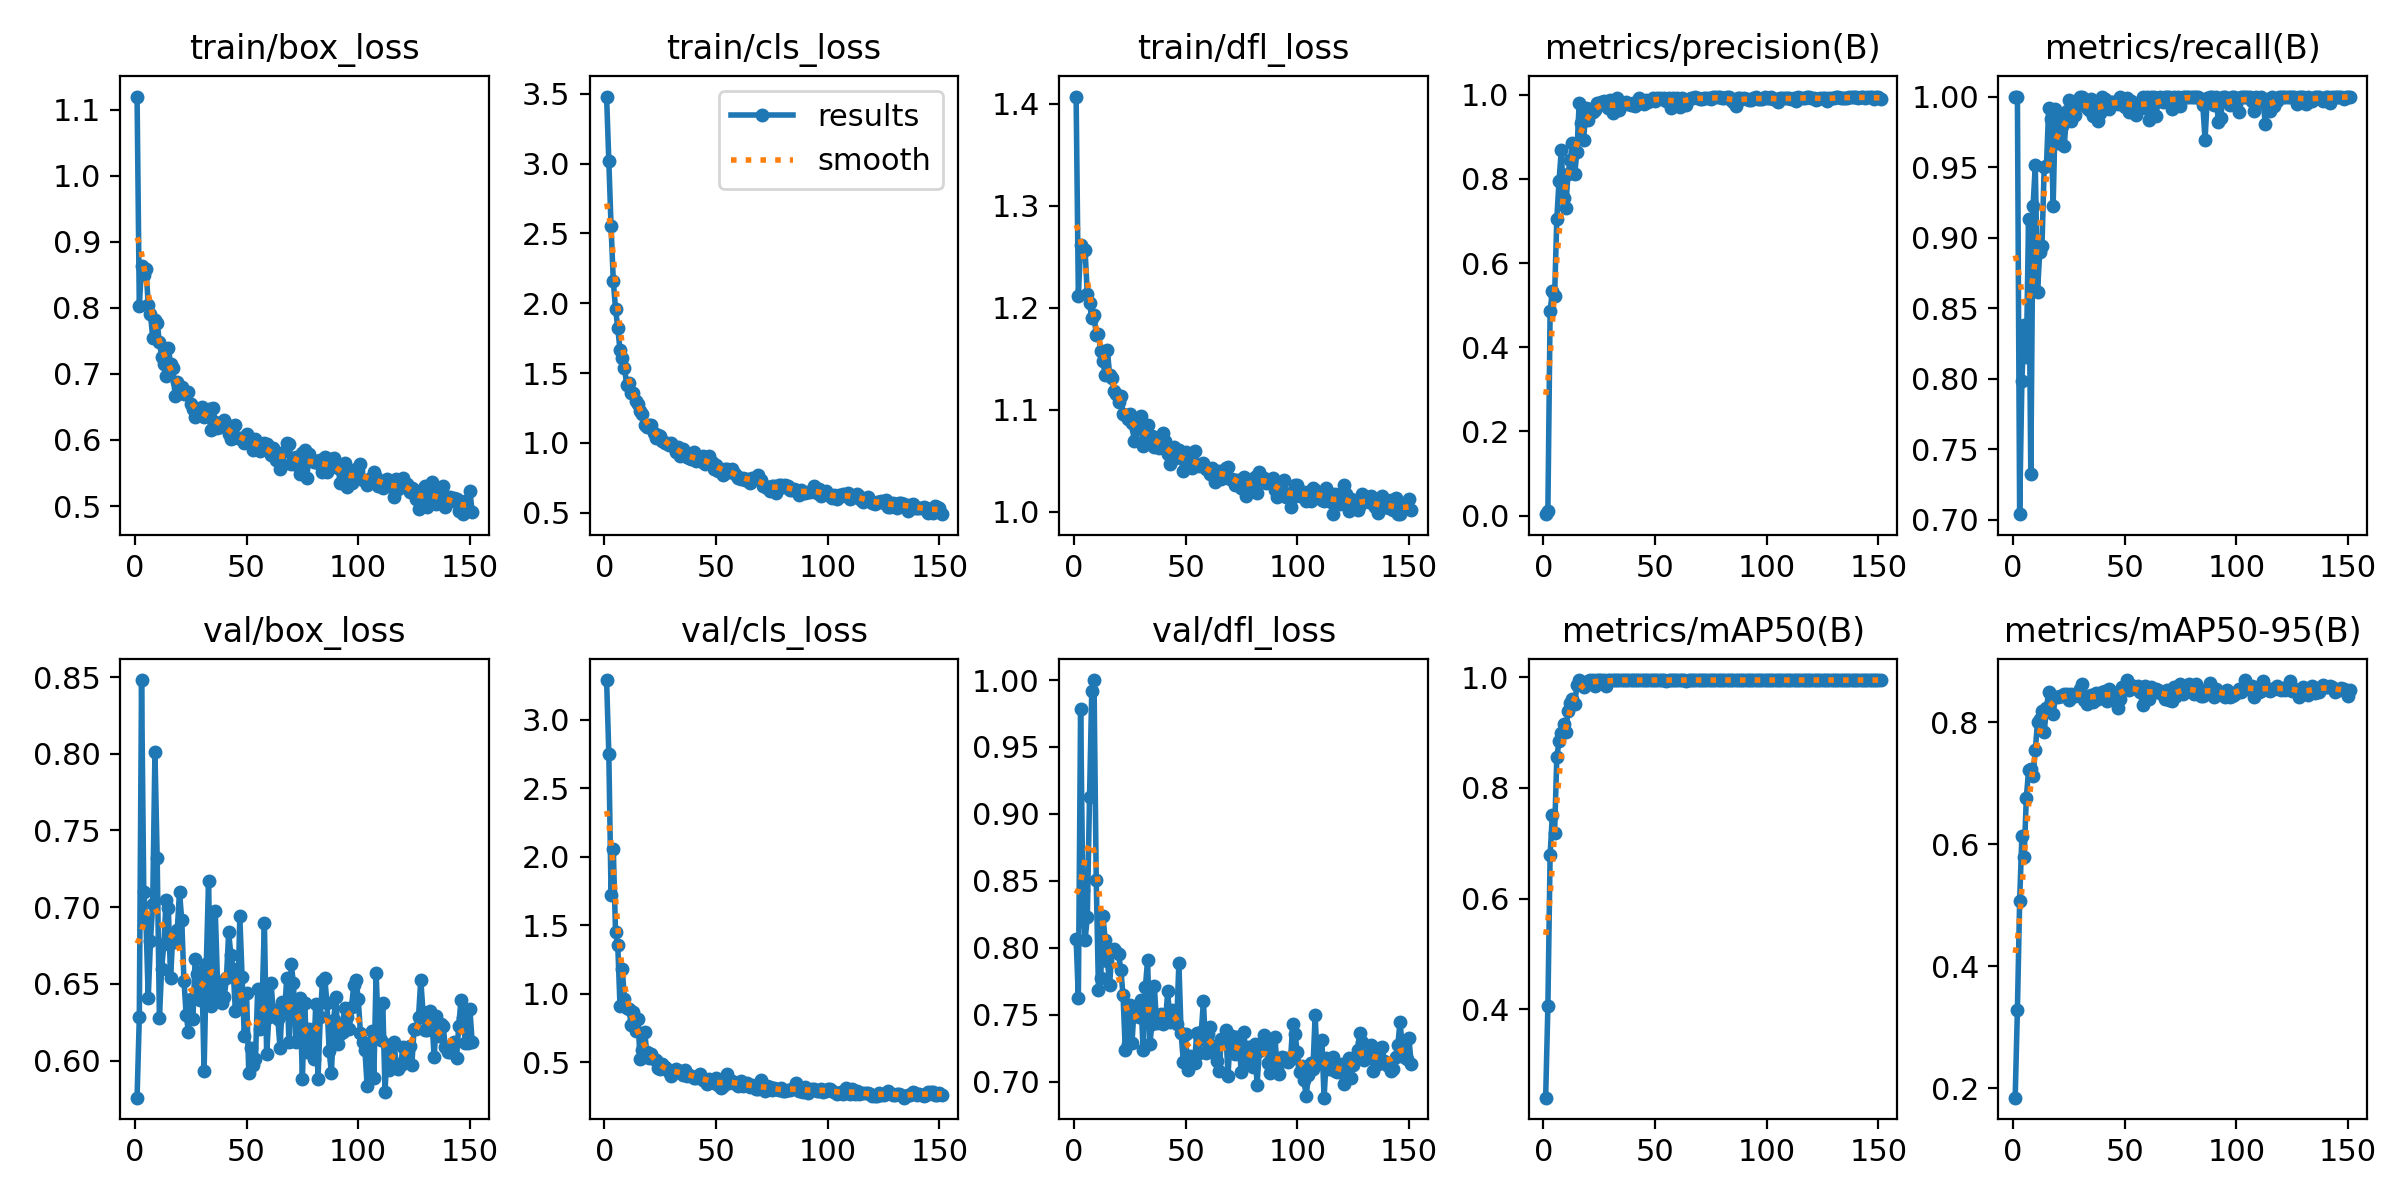

In [22]:
%cd {HOME}
Image (filename=f'{HOME}/runs/detect/train/results.png', width=900)

/content


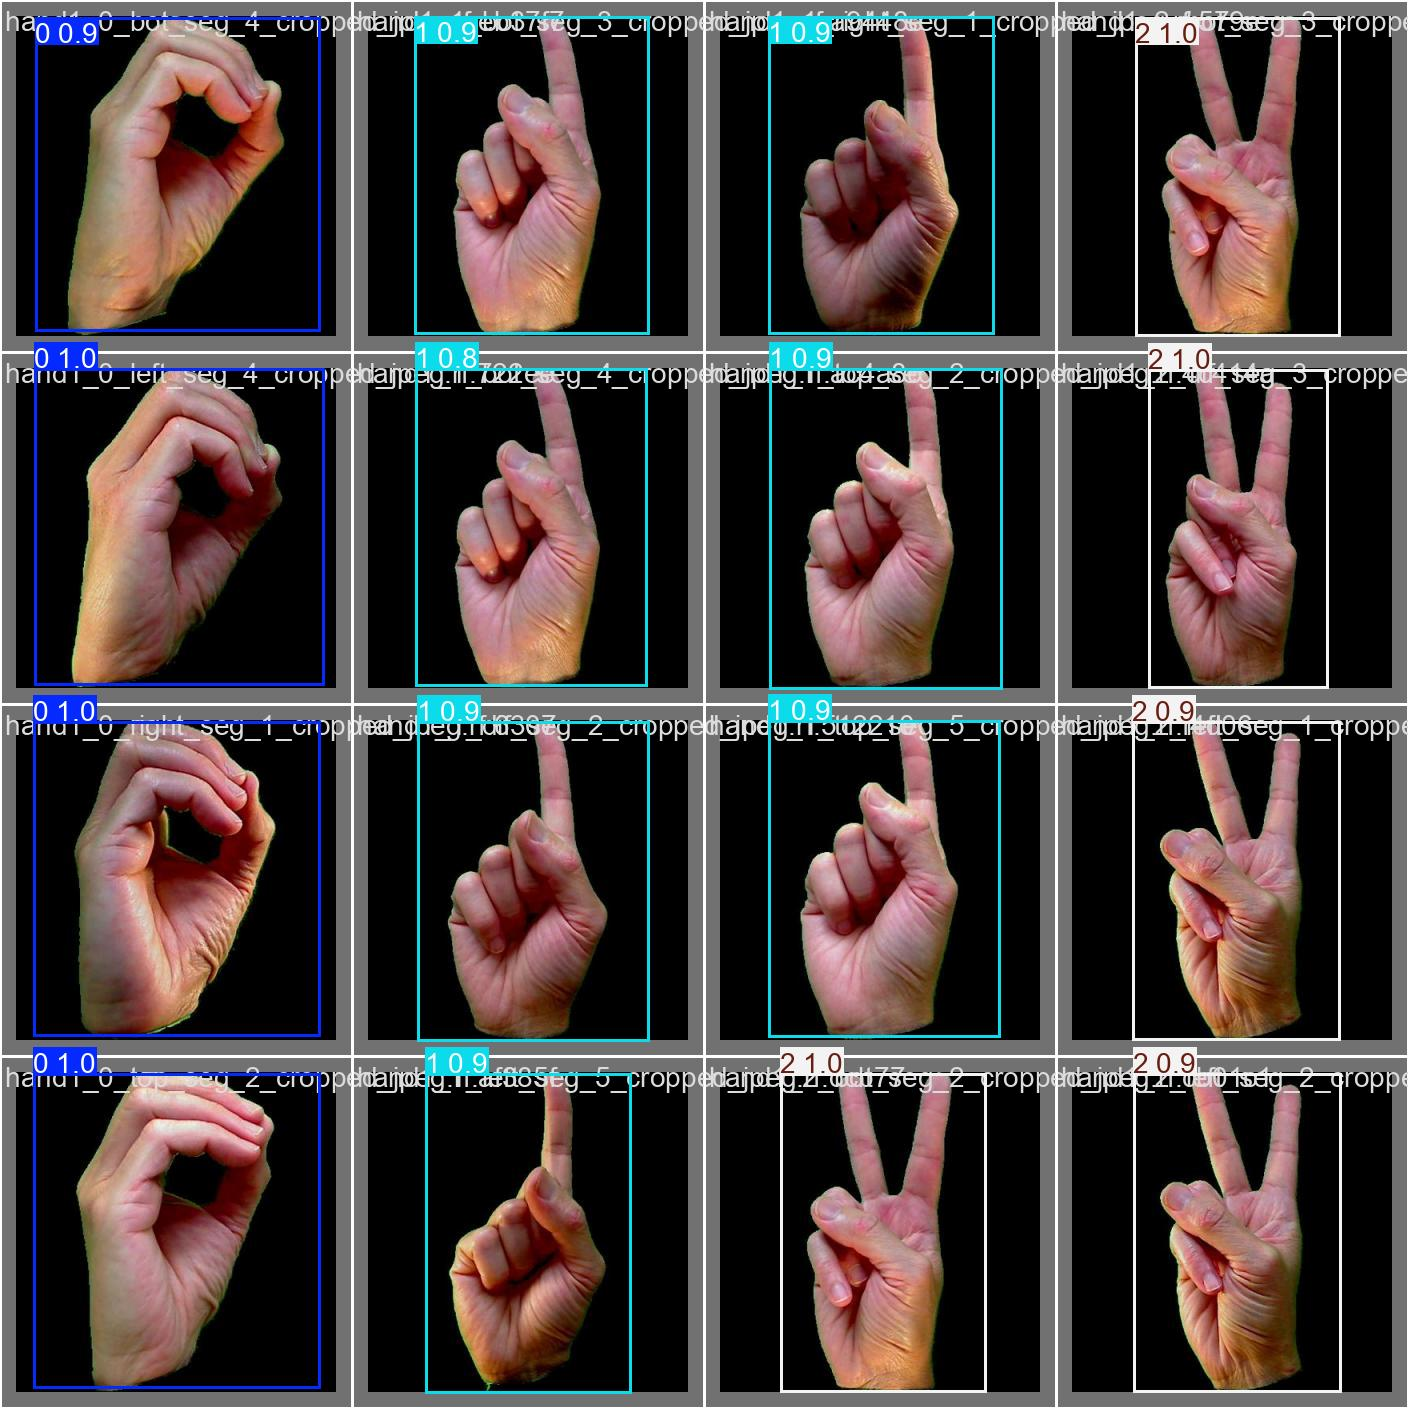

In [23]:
#taking a look of how the model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validating Custom Model

In [24]:
#taking model best weights and use them to validate model
#the difference between previous and this session is that in here we use our mode=val instead of train

%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/ASLDetection-2/data.yaml

/content
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/ASLDetection-2/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100% 140/140 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:01<00:00,  7.43it/s]
                   all        140        140      0.992      0.999      0.995      0.868
                     0         14         14      0.992          1      0.995      0.925
                     1         14         14          1       0.99      0.995      0.713
                     2         14         14      0.991          1      0.995      0.863
                     3         14         14       0.99          1      0.995      0.911
                     4         15         15      0.992          1      0.995      0.874
                     5         13

## Inference with Custom Model

In [25]:
#test the model on test dataset images with no annotation
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/ASLDetection-2/test/images

/content
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

image 1/70 /content/datasets/ASLDetection-2/test/images/hand1_0_bot_seg_1_cropped_jpeg.rf.30f3ab1403141acc0f9465f54469689e.jpg: 320x320 1 0, 7.0ms
image 2/70 /content/datasets/ASLDetection-2/test/images/hand1_0_right_seg_5_cropped_jpeg.rf.a324aea7b487b955dc9b9c318832a76e.jpg: 320x320 1 0, 6.4ms
image 3/70 /content/datasets/ASLDetection-2/test/images/hand1_0_top_seg_4_cropped_jpeg.rf.f8676e0c24756bab7387592c15ce832b.jpg: 320x320 1 0, 5.7ms
image 4/70 /content/datasets/ASLDetection-2/test/images/hand1_1_dif_seg_3_cropped_jpeg.rf.e781efc74c55822e1d4334ada9295eb9.jpg: 320x320 1 1, 5.5ms
image 5/70 /content/datasets/ASLDetection-2/test/images/hand1_1_top_seg_1_cropped_jpeg.rf.c03b3d9b3740d6875b862b1479b78e81.jpg: 320x320 1 1, 5.5ms
image 6/70 /content/datasets/ASLDetection-2/test/images/hand1_1_top_seg_4_cropped_jpeg.rf.

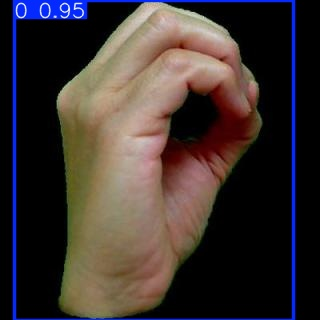

In [26]:
Image("/content/runs/detect/predict/hand2_0_dif_seg_1_cropped_jpeg.rf.9510e45a1d6ff6d8e4f58c219b7cd28f.jpg")

##Test on random videos

In [27]:
!gdown --id 1W2wOLrLTrlBotNe1IVF-LiOLdV6Iuo3D -O video.mp4

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W2wOLrLTrlBotNe1IVF-LiOLdV6Iuo3D
To: /content/video.mp4
100% 3.28M/3.28M [00:00<00:00, 171MB/s]


In [28]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/video.mp4'

/content
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/607) /content/video.mp4: 320x192 1 2, 32.2ms
video 1/1 (frame 2/607) /content/video.mp4: 320x192 1 2, 6.5ms
video 1/1 (frame 3/607) /content/video.mp4: 320x192 1 2, 5.9ms
video 1/1 (frame 4/607) /content/video.mp4: 320x192 1 2, 5.9ms
video 1/1 (frame 5/607) /content/video.mp4: 320x192 1 2, 5.8ms
video 1/1 (frame 6/607) /content/video.mp4: 320x192 1 2, 5.7ms
video 1/1 (frame 7/607) /content/video.mp4: 320x192 1 2, 1 7, 5.7ms
video 1/1 (frame 8/607) /content/video.mp4: 320x192 1 2, 5.7ms
video 1/1 (frame 9/607) /content/video.mp4: 320x192 1 2, 1 8, 5.7ms
video 1/1 (frame 10/607) /content/video.mp4: 320x192 1 2, 1 8, 5.7ms
video 1/1 (frame 11/607) /content/video.mp4: 320x192 1 2, 1 8, 5.7ms
video 1/1 (frame 12/607) /content/video.mp4: 320x192 1 2, 1 8, 5.7ms
video 1/1 (frame 13/607) /content/video.mp

##Display Video

In [29]:
from IPython.display import HTML
from base64 import b64encode
import os
# input video path
save_path = '/content/runs/detect/predict2/video.avi'

# compressed video path
compressed_path = "/content/compressed_video.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# display the compressed video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

##Export Model in TFlite format

In [30]:
!yolo task=detect mode=export model=runs/detect/train/weights/best.pt format=tflite nms=True

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 300, 6) (5.9 MB)
E0000 00:00:1743575327.715849   12831 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743575327.721949   12831 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

## To Confirm it prints 10 labels

In [31]:
from ultralytics import YOLO
model = YOLO('runs/detect/train/weights/best.pt')
print(model.names)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


In [33]:
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/content/runs/detect/train/weights/best_saved_model/best_float16.tflite")
interpreter.allocate_tensors()

# Get output details
output_details = interpreter.get_output_details()

# Print shape and number of channels
print("Output shape:", output_details[0]['shape'])         # Example: [1, 15, 2100]
print("Number of classes:", output_details[0]['shape'][1] - 5)  # Subtract 4 bbox + 1 conf = class count


Output shape: [  1 300   6]
Number of classes: 295


##Download TFLite file

In [34]:
!zip -r /content/runs/detect/train/weights/best_saved_model.zip /content/runs/detect/train/weights/best_saved_model

  adding: content/runs/detect/train/weights/best_saved_model/ (stored 0%)
  adding: content/runs/detect/train/weights/best_saved_model/best_float32.tflite (deflated 14%)
  adding: content/runs/detect/train/weights/best_saved_model/best_float16.tflite (deflated 10%)
  adding: content/runs/detect/train/weights/best_saved_model/variables/ (stored 0%)
  adding: content/runs/detect/train/weights/best_saved_model/variables/variables.index (deflated 33%)
  adding: content/runs/detect/train/weights/best_saved_model/variables/variables.data-00000-of-00001 (deflated 86%)
  adding: content/runs/detect/train/weights/best_saved_model/saved_model.pb (deflated 13%)
  adding: content/runs/detect/train/weights/best_saved_model/fingerprint.pb (stored 0%)
  adding: content/runs/detect/train/weights/best_saved_model/metadata.yaml (deflated 38%)
  adding: content/runs/detect/train/weights/best_saved_model/assets/ (stored 0%)


In [35]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best_saved_model.zip')
#I download whole folder for just incase cuz idw ro rerun
#for flutter, it just use only /content/runs/detect/train/weights/best_saved_model/best_float16.tflite or /content/runs/detect/train/weights/best_saved_model/best_float32.tflite
#you can just directly download only a file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>